<a href="https://colab.research.google.com/github/BlackSparrow-43/Automated-Wifi_hack/blob/main/My_Projects/Q-Learning/FrozenLake_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install gym[all] -q

import numpy as np
import gym
import random
import time
from tqdm.notebook import tqdm

     |████████████████████████████████| 2.4 MB 8.1 MB/s 
     |████████████████████████████████| 3.4 MB 31.9 MB/s 
     |████████████████████████████████| 1.2 MB 64.8 MB/s 
     |████████████████████████████████| 18.3 MB 107 kB/s 
     |████████████████████████████████| 3.5 MB 53.3 MB/s 
     |████████████████████████████████| 3.7 MB 33.9 MB/s 
     |████████████████████████████████| 296 kB 60.8 MB/s 
     |████████████████████████████████| 2.1 MB 37.8 MB/s 
     |████████████████████████████████| 1.6 MB 51.0 MB/s 
     |████████████████████████████████| 207 kB 60.9 MB/s 
     |████████████████████████████████| 3.1 MB 38.9 MB/s 


In [4]:
!pip install pyvirtualdisplay -q
!apt install xvfb -y -q

import matplotlib.pyplot as plt
from pyvirtualdisplay import Display
from IPython import display

%matplotlib inline
Display().start()

Reading package lists...
Building dependency tree...
Reading state information...
xvfb is already the newest version (2:1.19.6-1ubuntu4.11).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [5]:
def show_render_1(env):
  plt.figure(3,figsize=(27,9))
  plt.imshow(env.render(mode='rgb_array'))
  display.display(plt.gcf())
  display.clear_output(wait=True)

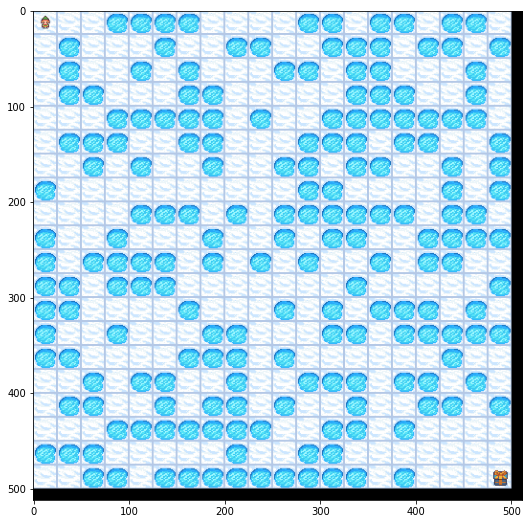

In [6]:
from gym.envs.toy_text.frozen_lake import generate_random_map

map_size = 20
random_map = generate_random_map(size=map_size, p=.5)
#random_map=["SFFF", "FHFH", "FFFH", "HFFG"]

env = gym.make("FrozenLake-v1", map_name="8x8",desc=random_map, is_slippery=False)
env.reset()
show_render_1(env)

In [7]:
from gym.envs.registration import register

register(
    id="FrozenLake-v1",
    entry_point = "gym.envs.toy_text:FrozenLakeEnv",
    kwargs = {"map_name":random_map,
              "is_slippery":False},
    max_episode_steps = 1000,
    
)

/usr/local/lib/python3.7/dist-packages/gym/envs/registration.py:542: UserWarning: WARN: Overriding environment FrozenLake-v1
  logger.warn(f"Overriding environment {spec.id}")


In [8]:
state_space = env.observation_space.n
action_space = env.action_space.n
q_table = np.zeros((state_space,action_space))

(state_space,action_space)

(400, 4)

In [9]:
epsilon = 1.
max_epsilon = 1.
min_epsilon = .01
decay_rate = .0005

total_episodes = 30000
each_episode_steps = 1000
learning_rate = 0.8
discount_rate = 0.95
log_interval = 1000

In [10]:
def epsilon_greedy_policy(epsilon,state,q_table):
  if random.uniform(0,1) > epsilon:
    action = np.argmax(q_table[state])
    select="table"
  else:
    action = env.action_space.sample()
    select = "random"
  return action, select

In [11]:
def epsilon_reduce(epsiode):
  return min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*epsiode)

In [12]:
def greedy_policy(state,q_table):
  return np.max(q_table[state])

In [13]:
def new_reward(reward, state, done):
  goal = (map_size**2)-1
  if done:
    if state == goal:
      reward = 1000
    else:
      reward = -500
  else:
    reward = -2
  return reward

In [14]:
def train():
  table_nos, random_nos, total_rewards, episode_reward = 0, 0, 0, 0
  for episode in range(total_episodes):
    state = env.reset()
    step = 0
    done = False
    step_reward = 0
    epsilon = epsilon_reduce(episode)
    for step in range(each_episode_steps):
      action, select = epsilon_greedy_policy(epsilon, state, q_table)
      new_state, reward, done, info = env.step(action)
      rewards = new_reward(reward, new_state, done)
      error = learning_rate*(rewards + discount_rate*(greedy_policy(new_state, q_table)) - q_table[state][action])
      q_table[state][action] = q_table[state][action] + error
      step_reward += rewards
      if done:
        break
      state = new_state
      if select == "table":
        table_nos += 1
      elif select == "random":
        random_nos += 1
    episode_reward += step_reward
    if episode % log_interval == 0:
      table_per = round((table_nos/(table_nos+random_nos))*100,2)
      random_per = round((random_nos/(table_nos+random_nos))*100,2)
      total_rewards += episode_reward
      print("Gen="+str(episode),"random="+str(random_per),"table="+str(table_per),"steps_taken="+str(step),"mean_reward="+str(episode_reward/1000),"episode_reward="+str(episode_reward),"total_reward="+str(total_rewards)) 
      episode_reward = 0
  env.close()
  print("Gen="+str(episode),"random="+str(random_per),"table="+str(table_per),"steps_taken="+str(step),"mean_reward="+str(episode_reward/1000),"episode_reward="+str(episode_reward),"total_reward="+str(total_rewards)) 
  return q_table

In [15]:
def play(q_table):
  state = env.reset()
  done = False
  rewards =0
  for step in range(each_episode_steps):
    time.sleep(1)
    show_render_1(env)
    action = np.argmax(q_table[state])
    new_state, reward, done, info = env.step(action)
    rewards += new_reward(reward, new_state, done)
    state = new_state
    if done:
      break
  show_render_1(env)
  print("#############steps_taken="+str(step),"reward="+str(rewards)+"###############")
  env.close()

In [16]:
#q_table = np.load("frozenlake.npy")

In [17]:
q_table_frozenlake = train()

Gen=0 random=100.0 table=0.0 steps_taken=6 mean_reward=-0.512 episode_reward=-512 total_reward=-512
Gen=1000 random=76.16 table=23.84 steps_taken=4 mean_reward=-512.448 episode_reward=-512448 total_reward=-512960
Gen=2000 random=56.33 table=43.67 steps_taken=4 mean_reward=-516.952 episode_reward=-516952 total_reward=-1029912
Gen=3000 random=41.13 table=58.87 steps_taken=16 mean_reward=-526.196 episode_reward=-526196 total_reward=-1556108
Gen=4000 random=30.09 table=69.91 steps_taken=20 mean_reward=-522.78 episode_reward=-522780 total_reward=-2078888
Gen=5000 random=22.91 table=77.09 steps_taken=27 mean_reward=-171.67 episode_reward=-171670 total_reward=-2250558
Gen=6000 random=17.9 table=82.1 steps_taken=39 mean_reward=91.742 episode_reward=91742 total_reward=-2158816
Gen=7000 random=14.51 table=85.49 steps_taken=41 mean_reward=264.144 episode_reward=264144 total_reward=-1894672
Gen=8000 random=12.05 table=87.95 steps_taken=32 mean_reward=456.03 episode_reward=456030 total_reward=-1438

#############steps_taken=39 reward=922###############


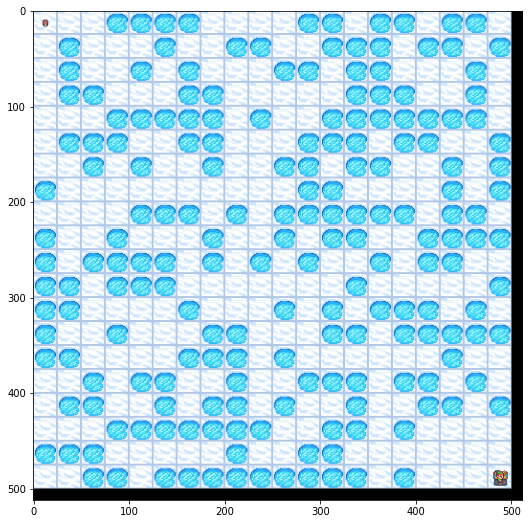

In [20]:
play(q_table_frozenlake)

In [18]:
#np.save("frozenlake.npy",q_table)

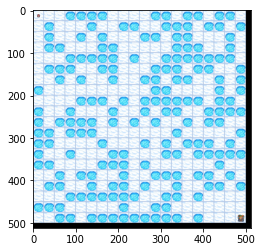

In [19]:
img = plt.imshow(env.render('rgb_array'))
def show_render_2(env):
  img.set_data(env.render('rgb_array')) 
  display.display(plt.gcf())
  display.clear_output(wait=True)

In [ ]:
!apt-get install python-opengl -y
!pip install piglet